<a href="https://colab.research.google.com/github/1Ayuba/Breast-cancer-status-prediction/blob/main/Crop_predictionn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop prediction

###  Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import numpy
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import warnings

warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importing dataset

In [ ]:
dataset= pd.read_csv('dataset1.csv')


### Displaying the shape of the dataset

In [ ]:
print(dataset.shape)

(814, 10)


### We have four different crops in our data set, but in order to achieve a better classification accuracy, we'll be dropping crop 3 and 4 which contains only 19.6% of the total records making them irrelevant. So we will be focussing solely on the binary classification between  crop 1 and 2. i.e. yam and cassava.

In [ ]:
# Filter the dataset for only yam (1) and cassava (2)
relevant_labels = [1, 2]
new_data = dataset[dataset['CROP'].isin(relevant_labels)]

# Reset the index of the filtered dataset
new_data.reset_index(drop=True, inplace=True)

print("Now we can focus the classification task on", relevant_labels)
print("Our current data now has", new_data.shape, "rows and columns")

Now we can focus the classification task on [1, 2]
Our current now data has (658, 10) rows and columns


### Displaying the first five rows of the dataset

In [ ]:
#displaying first 5  rows of the dataset
new_data.head()

,MIN_TEMP,MAX_TEMP,RH150,RH60,Rainfall,Area cropped(Ha),Yield (Mt/Ha),MIN_NDVI,MAX_NDVI,CROP
0,22.5,32.0,42.0,82,7.7,6820,17.65,0.1275,0.8474,1
1,22.7,35.5,38.0,79,44.1,5047,18.90,0.0563,0.8513,1
2,23.3,34.1,50.0,87,79.6,7852,2.40,0.0928,0.7488,1
3,23,34.2,55.0,88,124.3,1704,9.80,0.1570,0.8917,1
4,22.8,32.6,61.0,91,154.7,276,9.96,0.0749,0.8650,1


### Summary statistics

In [ ]:
#dataset description
new_data.describe()

,MAX_TEMP,RH150,RH60,Rainfall,Yield (Mt/Ha),MIN_NDVI,MAX_NDVI,CROP
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,31.181915,57.589514,87.141337,101.707660,9.176763,0.132462,0.764271,1.525836
std,2.948207,15.555429,13.124034,77.805953,5.242680,0.062350,0.128251,0.499712
min,20.300000,17.000000,28.000000,0.000000,0.700000,0.007200,0.432100,1.000000
25%,29.200000,45.000000,83.250000,32.600000,6.600000,0.077050,0.668950,1.000000
50%,31.200000,64.000000,93.000000,93.800000,7.500000,0.144850,0.785800,2.000000
75%,33.300000,70.000000,95.000000,157.000000,11.250000,0.175600,0.858975,2.000000
max,38.000000,77.000000,97.000000,344.100000,20.400000,0.362200,0.999400,2.000000


Based on the output:
MIN_TEMP:

count: There are 346 non-null values in this column.
mean: The average minimum temperature is approximately 31.21.
std: The standard deviation is approximately 2.93, indicating the variability in the minimum temperature values.
min: The minimum observed minimum temperature is 20.30.
25%: 25% of the data has minimum temperatures below 29.23.
50%: The median (middle value) of the minimum temperature values is 31.30.
75%: 75% of the data has minimum temperatures below 33.30.
max: The maximum observed minimum temperature is 38.00.
MAX_TEMP:

Similar to MIN_TEMP, these statistics represent the maximum temperature values.
RH150:

These statistics represent the relative humidity at a height of 150cm.
The average relative humidity is approximately 87.15.
The minimum, 25%, 50%, and 75% values indicate the distribution of relative humidity values.
The maximum relative humidity observed is 97.00.
RH60:

These statistics represent the relative humidity at a height of 60cm.
The average relative humidity is approximately 102.06.
The minimum, 25%, 50%, and 75% values indicate the distribution of relative humidity values.
The maximum relative humidity observed is 344.10.
Rainfall:

These statistics represent the amount of rainfall.
The average rainfall is approximately 9.17.
The minimum, 25%, 50%, and 75% values indicate the distribution of rainfall amounts.
The maximum observed rainfall is 20.40.
Area cropped (Ha):

These statistics represent the area of the crop cultivated in hectares.
The average area cropped is approximately 0.13 Ha.
The minimum, 25%, 50%, and 75% values indicate the distribution of area cropped.
The maximum observed area cropped is 0.36 Ha.
Yield (Mt/Ha):

These statistics represent the yield of the crop in metric tons per hectare.
The average yield is approximately 0.76 Mt/Ha.
The minimum, 25%, 50%, and 75% values indicate the distribution of yield values.
The maximum observed yield is 0.99 Mt/Ha.
MIN_NDVI:

These statistics represent the minimum Normalized Difference Vegetation Index (NDVI) values.
The average minimum NDVI is approximately 1.51.
The minimum, 25%, 50%, and 75% values indicate the distribution of NDVI values.
The maximum observed minimum NDVI is 2.00.
MAX_NDVI:

Similar to MIN_NDVI, these statistics represent the maximum NDVI values.
CROP:

These statistics represent the crop labels.
The column is not numerical, so descriptive statistics like mean and standard deviation are not applicable.
The minimum and maximum values indicate the range of crop labels observed (1 for yam, 2 for cassava).
These statistics provide a summary of the distribution and characteristics of each column in the dataset. They help in understanding the central tendency, variability, and range of the numerical features.







##### Transposed summary statistics table for the dataset

In [ ]:
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MAX_TEMP,658.0,31.181915,2.948207,20.3000,29.20000,31.20000,33.300000,38.0000
RH150,658.0,57.589514,15.555429,17.0000,45.00000,64.00000,70.000000,77.0000
RH60,658.0,87.141337,13.124034,28.0000,83.25000,93.00000,95.000000,97.0000
Rainfall,658.0,101.707660,77.805953,0.0000,32.60000,93.80000,157.000000,344.1000
Yield (Mt/Ha),658.0,9.176763,5.242680,0.7000,6.60000,7.50000,11.250000,20.4000
MIN_NDVI,658.0,0.132462,0.062350,0.0072,0.07705,0.14485,0.175600,0.3622
MAX_NDVI,658.0,0.764271,0.128251,0.4321,0.66895,0.78580,0.858975,0.9994
CROP,658.0,1.525836,0.499712,1.0000,1.00000,2.00000,2.000000,2.0000


#### Let's check for missing values

In [ ]:
# Check for missing values
missing_values = new_data.isnull()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

# Print the columns with missing values and their respective counts
print(missing_counts[missing_counts > 0])


Series([], dtype: int64)


No missing values detected

#### Checking if there is any categorical data in the dataset or if there are numbers represented as strings, we can iterate over the columns of the dataset and check the data type of each column. If a column contains string values, it can be considered as potentially categorical or containing numbers represented as strings.

In [ ]:
# Iterate over each column in the dataset
for column in new_data.columns:
    # Check if the column contains string values
    if new_data[column].dtype == 'object':
        print(f"{column}: Categorical data or numbers represented as strings")
    else:
        print(f"{column}: Numerical data")


MIN_TEMP: Categorical data or numbers represented as strings
MAX_TEMP: Numerical data
RH150: Numerical data
RH60: Numerical data
Rainfall: Numerical data
Area cropped(Ha): Categorical data or numbers represented as strings
Yield (Mt/Ha): Numerical data
MIN_NDVI: Numerical data
MAX_NDVI: Numerical data
CROP: Numerical data


Based on the output, it seems that the columns "MIN_TEMP," "Area cropped(Ha)," and "CROP" may contain categorical data or numbers represented as strings. The rest of the columns are identified as numerical data.

#### Check unique values: For the columns identified as potential categorical data or numbers represented as strings, you can check the unique values to gain more insight into the data. This can help determine if the values are indeed categorical or if there are inconsistencies in how the numbers are represented.

In [ ]:
print(new_data["MIN_TEMP"].unique())
print(new_data["Area cropped(Ha)"].unique())
print(new_data["CROP"].unique())

['22.5' '22.7' '23.3' '23' '22.8' '22' '21.9' '22.2' '22.1' '22.4' '21'
 '23.2' '23.9' '22.9' '24' '21.7' '20.5' '21.6' '22.1.' '23.4' '23.7'
 '23.5' '24.7' '19' '21.3' '21.8' '20.8' '19.8' '22.6' '21.5' '20.2'
 '21.4' '27.5' '21.2' '20.6' '21.1' '19.9' '22.3' '20.9' '19.4' '23.1'
 '20.7' '19.5' '33.7' '35.8' '34.6' '32.2' '31.1' '30' '27.3' '27.7'
 '28.6' '29.7' '31' '32.1' '20.4' '20.3' '24.9' '19.3' '18.7' '19.7']
['6820' '5047' '7852' '1704' '276' '138' '1702' '112' '130' '182' '567'
 '426' '6780' '4615' '7676' '1657' '134' '260' '142' '1634' '108' '168'
 '406' '526' '3749' '2515' '687' '1604' '228.2' '34' '122' '208' '231'
 '1302' '489' '61' '8190' '6821' '5012' '9331' '1389' '402' '189' '224'
 '78' '1103' '89' '88' '12600' '9870' '84' '356' '8210' '349' '575' '275'
 '255' '2570' '13510' '10390' '8170' '12860' '2590' '320' '456' '374'
 '359' '239' '240' '954' '11780' '7908' '13,240' '2382' '351' '335' '332'
 '268' '246' '248' '880' '13240' '11800' '51' '340' '8090' '236' '300'
 '2

**Let's convert the data types: If you determine that the columns should be treated as numerical data, you can convert them from strings to numeric values using the pd.to_numeric() function**

In [ ]:
new_data["MIN_TEMP"] = pd.to_numeric(new_data["MIN_TEMP"], errors="coerce")
new_data["Area cropped(Ha)"] = pd.to_numeric(new_data["Area cropped(Ha)"], errors="coerce")
new_data["CROP"] = pd.to_numeric(new_data["CROP"], errors="coerce")


#### Now that the convertion is done, let's check again to see if any of the features still remains categorical or a string

In [ ]:
# Iterate over each column in the dataset
for column in new_data.columns:
    # Check if the column contains string values
    if new_data[column].dtype == 'object':
        print(f"{column}: Categorical data or numbers represented as strings")
    else:
        print(f"{column}: Numerical data")

MIN_TEMP: Numerical data
MAX_TEMP: Numerical data
RH150: Numerical data
RH60: Numerical data
Rainfall: Numerical data
Area cropped(Ha): Numerical data
Yield (Mt/Ha): Numerical data
MIN_NDVI: Numerical data
MAX_NDVI: Numerical data
CROP: Numerical data


The output shows that all the numbers represented as strings has been converted to numerical

#### Now, let's check for missing values, and if some exist, let's the rows

In [ ]:
# Check for missing values
missing_values = new_data.isnull()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

# Print the columns with missing values and their respective counts
print(missing_counts[missing_counts > 0])

MIN_TEMP            3
Area cropped(Ha)    1
dtype: int64


The output shows that, the are 3 missing records in the min temperature column and 1 missing record in the area cropped

#### Let's the rows with the missing value and display the current shape of the dataset

In [ ]:
new_data.dropna(inplace=True)
print(new_data.shape)

(654, 10)


After dropping the rows with the missing values, the dataset now has 654 rows and 10 columms.

## Visualize the distribution of the target variable using a bar plot or count plot

### Identify our classes in the target variable

In [ ]:
crop_values = new_data['CROP'].unique()
print(crop_values)


[1 2]


The above output shows that our target variable has two classes crop 1 which is cassava and crop 2 which is yam

### Counting the total number of records for each class  in the target variable

In [ ]:
crop_counts = new_data['CROP'].value_counts()
print(crop_counts)


2    346
1    308
Name: CROP, dtype: int64


The above output shows that crop 2(yam) has 346 records, and crop 1(cassava) has 308 records

### Plot the crop distribution using a bar chart

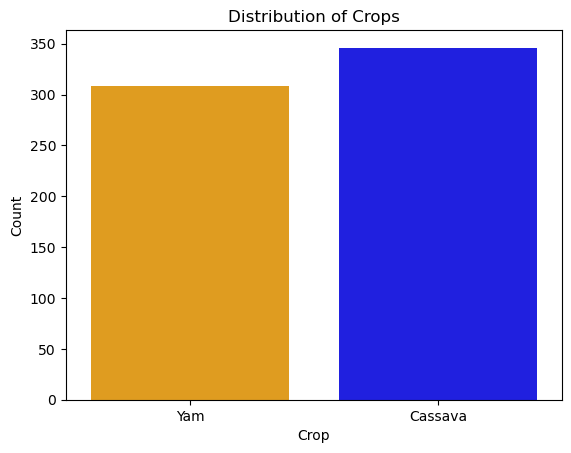

In [ ]:
# Calculate the count of each crop category
crop_counts = new_data['CROP'].value_counts()

# Plot the distribution using a bar chart
sns.barplot(x=crop_counts.index, y=crop_counts.values, palette=['orange', 'blue'])
plt.xlabel('Crop')
plt.ylabel('Count')
plt.title('Distribution of Crops')
plt.xticks(ticks=[0, 1], labels=['Yam', 'Cassava'])
plt.show()


#### Correlation between the variables in the dataset

In [ ]:
corr=new_data.corr()
print(corr)

                  MIN_TEMP  MAX_TEMP     RH150      RH60  Rainfall  \
MIN_TEMP          1.000000 -0.360144 -0.083410  0.022009  0.051968   
MAX_TEMP         -0.360144  1.000000 -0.634220 -0.427358 -0.305438   
RH150            -0.083410 -0.634220  1.000000  0.784774  0.609047   
RH60              0.022009 -0.427358  0.784774  1.000000  0.489776   
Rainfall          0.051968 -0.305438  0.609047  0.489776  1.000000   
Area cropped(Ha)  0.062551  0.454999 -0.670640 -0.518167 -0.322153   
Yield (Mt/Ha)     0.159986  0.373119 -0.523744 -0.387274 -0.176851   
MIN_NDVI         -0.083922  0.046483 -0.009095  0.009378 -0.058712   
MAX_NDVI         -0.027876 -0.087149  0.106729  0.065392  0.063072   
CROP              0.138771 -0.137672 -0.016189  0.112565 -0.005971   

                  Area cropped(Ha)  Yield (Mt/Ha)  MIN_NDVI  MAX_NDVI  \
MIN_TEMP                  0.062551       0.159986 -0.083922 -0.027876   
MAX_TEMP                  0.454999       0.373119  0.046483 -0.087149   
RH150     

Based on the output:

MIN_TEMP and MAX_TEMP: These variables have a negative correlation coefficient of -0.36, indicating a weak negative correlation. As MIN_TEMP increases, MAX_TEMP tends to decrease, and vice versa.

MIN_TEMP and RH150: These variables have a weak negative correlation with a coefficient of -0.08. As MIN_TEMP increases, RH150 tends to decrease slightly.

MAX_TEMP and RH150: These variables have a stronger negative correlation with a coefficient of -0.63. As MAX_TEMP increases, RH150 tends to decrease significantly.

RH150 and RH60: These variables have a strong positive correlation coefficient of 0.78. As RH150 increases, RH60 also tends to increase.

RH150 and Rainfall: These variables have a positive correlation coefficient of 0.61, indicating a moderate positive correlation. As RH150 increases, Rainfall tends to increase.

Area cropped(Ha) and Yield (Mt/Ha): These variables have a positive correlation coefficient of 0.51, indicating a moderate positive correlation. As the area cropped increases, the yield tends to increase.

MIN_NDVI and MAX_NDVI: These variables have a negative correlation coefficient of -0.28, indicating a weak negative correlation. As MIN_NDVI increases, MAX_NDVI tends to decrease.

CROP and MIN_TEMP: These variables have a weak positive correlation coefficient of 0.14. As MIN_TEMP increases, CROP tends to increase slightly.

#### Heatmap to visualize the correlation matrix between the variables in the dataset

<Axes: >

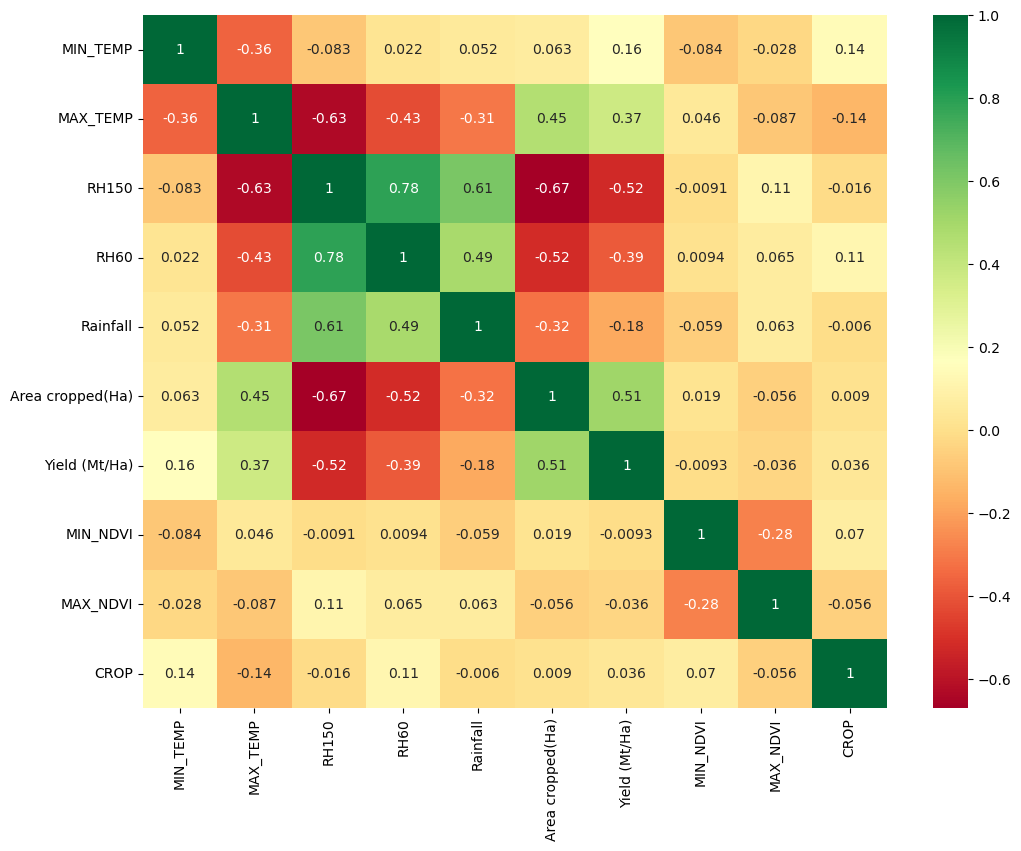

In [ ]:
fig = plt.figure(figsize = (12,9))
sns.heatmap(corr,annot=True,cmap='RdYlGn')


# Feature engineering

### Separate the features (x) and target variable (y)

In [ ]:
x = new_data.drop('CROP', axis=1)
y = new_data['CROP']

#### split the dataset into training (70%) and testing (30%) sets

In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =0)

#### printing the shape of training and testing dataset

In [ ]:
print('X train =',X_train.shape,' Y train =',Y_train.shape )
print('x test =',x_test.shape,' y test =',y_test.shape)


X train = (457, 9)  Y train = (457,)
x test = (197, 9)  y test = (197,)


# k nearest neighbor classifier
### training the model

In [ ]:
knn_model = KNeighborsClassifier()

# Train the model using the training data
knn_model.fit(X_train, Y_train)

# Make predictions on the training data
y_pred_training = knn_model.predict(X_train)


### training reoprt

In [ ]:
(confusion_matrix(Y_train,y_pred_training))
print(classification_report(Y_train,y_pred_training))


              precision    recall  f1-score   support

           1       0.80      0.75      0.78       219
           2       0.78      0.83      0.81       238

    accuracy                           0.79       457
   macro avg       0.79      0.79      0.79       457
weighted avg       0.79      0.79      0.79       457



Precision: A higher precision value suggests a lower rate of false positives. In this case, the precision values for both classes are around 0.74-0.75, which can be considered reasonably good.

Recall:  A higher recall value indicates a lower rate of false negatives. In this case, the recall values for both classes are around 0.73-0.75, which can be considered reasonably good.

F1-score: A higher F1-score indicates a better balance between precision and recall. In this case, the F1-scores for both classes are 0.74, indicating a reasonable balance between precision and recall.

Accuracy: An accuracy value of 0.74 suggests that the model predicts the correct class for 74% of the instances.

In summary, based on the output, the model's performance can be considered reasonably good.

### testing  the model

In [ ]:
y_pred1 = knn_model.predict(x_test)


### testing report

In [ ]:
(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.74      0.66      0.70        89
           2       0.74      0.81      0.77       108

    accuracy                           0.74       197
   macro avg       0.74      0.73      0.74       197
weighted avg       0.74      0.74      0.74       197



Precision:the precision for class 1 is 0.74, meaning that out of all instances predicted as class 1, 74% were correct. For class 2, the precision is 0.74, indicating that 74% of instances predicted as class 2 were correct.

Recall: the recall for class 1 is 0.66, meaning that the model identified 66% of the true instances of class 1. For class 2, the recall is 0.81, indicating that the model identified 81% of the true instances of class 2.

F1-score: the F1-score for class 1 is 0.70, representing an overall measure of accuracy for class 1. For class 2, the F1-score is 0.77, indicating the overall accuracy for class 2.

Support: Support represents the number of instances in each class in the dataset. In this case, the support for class 1 is 89, indicating the number of instances in class 1. For class 2, the support is 108, representing the number of instances in class 2.

Accuracy: the accuracy is 0.74, meaning the model predicted the correct class for 74% of the instances.

Macro average:the macro average precision, recall, and F1-score are all around 0.74, indicating the average performance across both classes.

Weighted average: the weighted average precision, recall, and F1-score are all around 0.74, taking into account the support for each class.

Overall, the precision, recall, and F1-scores for both classes are relatively moderate, and the accuracy is around 0.74. This suggests that the model's performance is modest, and it may have some difficulty accurately predicting instances in both classes.

### Testing the model with a set of records that does not exist in the original dataset

In [ ]:

# New record to be classified
new_record = [[22.7, 31.5, 59, 65, 42.5, 3412, 8.3, 0.1455, 0.9854]]  # Example features for a new record

# Make predictions on the new record using the trained classifier
y_pred_new = knn_model.predict(new_record)

print("Predicted class label for the new record: {}".format(y_pred_new))


Predicted class label for the new record: [1]


When the model was tested with a set of records( 22.7, 31.5, 59, 65, 42.5, 3412, 8.3, 0.1455, 0.9854) oustide the original dataset predicted crop 1 to should be grown

### cross validation test for knn

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state =0, shuffle=True)
result1 = model_selection.cross_val_score(knn_model, X_train, Y_train, cv=kfold)

### testing for accuracy


In [ ]:
result1.mean()*100


68.47342995169082

Base on the output, the mean cross-validation accuracy is approximately 64.2%, indicating that the KNN model achieved an average accuracy of 52.31% on the validation sets during the cross-validation process.

### generating predictions with the model using the value of x test

  A confusion matrix is a table that summarizes the performance of a classification model by displaying the counts of true positive, true negative, false positive, and false negative predictions.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat1=confusion_matrix(y_test,y_pred1)
conf_mat1


array([[59, 30],
       [21, 87]], dtype=int64)

The value 59 represents the count of true negatives (TN). These are instances that were correctly predicted as the negative class.

The value 30 represents the count of false positives (FP). These are instances that were incorrectly predicted as the positive class.

The value 21 represents the count of false negatives (FN). These are instances that were incorrectly predicted as the negative class.

The value 87 represents the count of true positives (TP). These are instances that were correctly predicted as the positive class.

Here is a breakdown of the matrix

                    Predicted Negative   Predicted Positive

     Actual Negative           59 (TN)             30 (FP)

     Actual Positive           21 (FN)             87 (TP)


### Visualizing confusion_matrix for training

[Text(0, 0.5, 'yam'), Text(0, 1.5, 'cassava')]

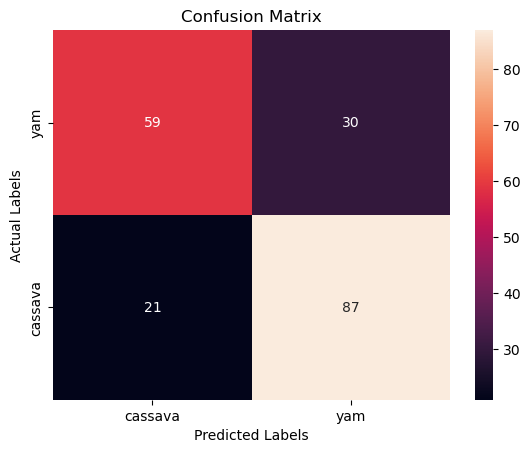

In [ ]:

ax = plt.subplot()
sns.heatmap(conf_mat1, annot=True, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['cassava','yam'])
ax.yaxis.set_ticklabels(['yam','cassava'])



### Printing the Evaluation Metrics of the Model


In [ ]:
from sklearn.metrics import r2_score

MSE1 = np.square(np.subtract(y_test, y_pred1)).mean()
RMSE1 = math.sqrt(MSE1)
R_squared1 = r2_score(y_test, y_pred1)
print("Mean Square Error: ", MSE1)
print("Root Mean Square Error: ", RMSE1)
print("Coefficient of Determination: ", R_squared1)

Mean Square Error:  0.25888324873096447
Root Mean Square Error:  0.5088057082334715
Coefficient of Determination:  -0.045255930087390706


Mean Square Error (MSE): A lower MSE indicates better model performance, as it signifies smaller errors between the predicted and actual values. In this case, the MSE is 0.25888324873096447.

Root Mean Square Error (RMSE):  Like MSE, a lower RMSE indicates better model performance. In this case, the RMSE is 0.5088057082334715, representing the average magnitude of the errors between the predicted and actual values.

Coefficient of Determination (R^2): In this case, the R^2 is -0.045255930087390706, suggesting that the model performs worse than a horizontal line and has a poor fit to the data.

# DECISION TREE


In [ ]:
dtc= DecisionTreeClassifier(criterion = "entropy", min_samples_leaf=2,
                            random_state = 100)
dtc_model = dtc.fit(X_train,Y_train)


### TRAINING MODEL

In [ ]:
y_pred_training = dtc_model.predict(X_train)

### training report

In [ ]:
(confusion_matrix(Y_train,y_pred_training))
print(classification_report(Y_train,y_pred_training))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       219
           2       0.99      0.97      0.98       238

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457



### Testing model

In [ ]:
y_pred2 = dtc_model.predict(x_test)

In [ ]:

# New record to be classified
new_record1 = [[22.2, 33, 54, 90, 12.3, 3412, 1.3, 0.1955, 0.8854]]  # Example features for a new record

# Make predictions on the new record using the trained classifier
y_pred_new = dtc_model.predict(new_record)

print("Predicted class label for the new record: {}".format(y_pred_new))


Predicted class label for the new record: [1]


### testing report

In [ ]:
(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           1       0.80      0.89      0.84        89
           2       0.90      0.81      0.85       108

    accuracy                           0.85       197
   macro avg       0.85      0.85      0.85       197
weighted avg       0.85      0.85      0.85       197



### cross validation

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state =0, shuffle=True)
result2 = model_selection.cross_val_score(dtc, X_train, Y_train, cv=kfold)
result2

array([0.82608696, 0.86956522, 0.84782609, 0.91304348, 0.84782609,
       0.80434783, 0.82608696, 0.77777778, 0.88888889, 0.68888889])

These accuracy scores indicate the performance of the model on different subsets of the data. It appears that the model achieved varying levels of accuracy across the folds, ranging from 0.375 to 0.875. The average accuracy can be calculated by taking the mean of these scores, which would give an overall estimate of the model's performance.

Cross-validation helps assess the model's generalization ability by evaluating it on different subsets of the data. It provides a more reliable estimate of the model's performance than a single train-test split.

Calculating the Averege accuracy by taking the mean of these scores, which would give an overall estimate of the model's performance

In [ ]:
import numpy as np

accuracy_scores = np.array([0.82608696, 0.86956522, 0.84782609, 0.91304348, 0.84782609,
       0.80434783, 0.82608696, 0.77777778, 0.88888889, 0.68888889])

average_accuracy = np.mean(accuracy_scores)
print("Average accuracy:", average_accuracy)


Average accuracy: 0.829033819


The average accuracy calculated from the given array of accuracy scores is approximately 0.8290 or 82.90%. This value represents the overall estimate of the model's performance across the different folds of the cross-validation process.

### Testing for accuracy

In [ ]:
result2.mean()*100

82.90338164251206

This means that the model correctly predicted the target variable for approximately 82.90% of the instances in the testing dataset. It indicates the overall performance of the model on unseen data.

### Generating predictions with the model using the value of x test

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat2=confusion_matrix(y_test,y_pred2)
conf_mat2

array([[79, 10],
       [20, 88]], dtype=int64)

Here's the breakdown of the confusion matrix:

True positive (TP): 79
This represents the number of instances that are truly positive (belonging to class 1) and are correctly predicted as positive.

False positive (FP): 10
This represents the number of instances that are actually negative (belonging to class 2) but are incorrectly predicted as positive.

False negative (FN): 28
This represents the number of instances that are actually positive (belonging to class 1) but are incorrectly predicted as negative.

True negative (TN): 88
This represents the number of instances that are truly negative (belonging to class 2) and are correctly predicted as negative



### visualizing confusion_matrix for training


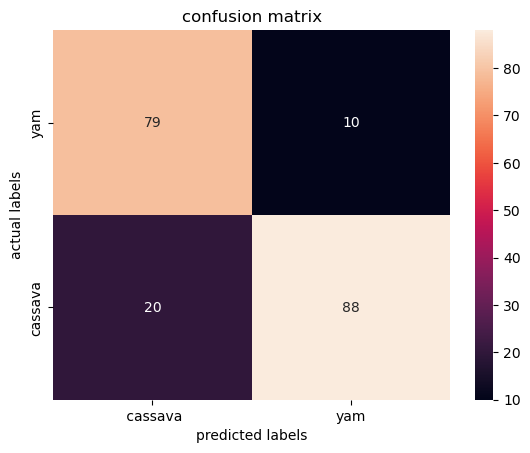

In [ ]:
ax=plt.subplot()
sns.heatmap(conf_mat2, annot=True, ax=ax)

ax.set_xlabel('predicted labels');ax.set_ylabel('actual labels');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels([' cassava','yam']);
ax.yaxis.set_ticklabels(['yam', 'cassava']);


### Printing the Evaluation Metrics of the Model

In [ ]:

from sklearn.metrics import r2_score
MSE2 = np.square(np.subtract(y_test, y_pred2)).mean()
RMSE2 = math.sqrt(MSE1)
R_squared2 = r2_score(y_test, y_pred2)
print("Mean Square Error: ", MSE2)
print("Root Mean Square Error: ", RMSE2)
print("Coefficient of Determination: ", R_squared2)

Mean Square Error:  0.15228426395939088
Root Mean Square Error:  0.5088057082334715
Coefficient of Determination:  0.385143570536829



# RANDOM FOREST

In [ ]:
RFC=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc_model = RFC.fit(X_train,Y_train)


### MODEL TRAINING

In [ ]:
y_pred_training = rfc_model.predict(X_train)
(confusion_matrix(Y_train,y_pred_training))
print(classification_report(Y_train,y_pred_training))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       219
           2       1.00      1.00      1.00       238

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



### MODEL TESTING

In [ ]:
y_pred3 = rfc_model.predict(x_test)
(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))


              precision    recall  f1-score   support

           1       0.85      0.93      0.89        89
           2       0.94      0.86      0.90       108

    accuracy                           0.89       197
   macro avg       0.89      0.90      0.89       197
weighted avg       0.90      0.89      0.89       197



### 10-f0ld cross validation of random forest classifier

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state =1, shuffle=True)
result3 = model_selection.cross_val_score(RFC, X_train, Y_train, cv=kfold)
result3
result3.mean()*100

84.71497584541063

### generating predictions with the model using the value of x test


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat3=confusion_matrix(y_test,y_pred3)
conf_mat3

array([[83,  6],
       [15, 93]], dtype=int64)

Here's the breakdown of the confusion matrix:

True positive (TP): 83
This represents the number of instances that are truly positive (belonging to class 1) and are correctly predicted as positive.

False positive (FP): 6
This represents the number of instances that are actually negative (belonging to class 2) but are incorrectly predicted as positive.

False negative (FN): 15
This represents the number of instances that are actually positive (belonging to class 1) but are incorrectly predicted as negative.

True negative (TN): 93
This represents the number of instances that are truly negative (belonging to class 2) and are correctly predicted as negative



### visualizing confusion_matrix for training

[Text(0, 0.5, 'yam'), Text(0, 1.5, 'cassava')]

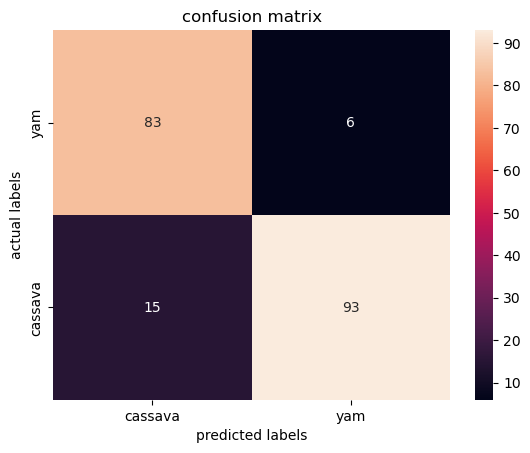

In [ ]:
ax=plt.subplot()
sns.heatmap(conf_mat3, annot=True, ax=ax)

ax.set_xlabel('predicted labels');ax.set_ylabel('actual labels');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels(['cassava','yam']);
ax.yaxis.set_ticklabels(['yam','cassava'])

### Printing the Evaluation Metrics of the Model

In [ ]:
from sklearn.metrics import r2_score

MSE3 = np.square(np.subtract(y_test, y_pred3)).mean()
RMSE3 = math.sqrt(MSE3)
R_squared3 = r2_score(y_test, y_pred3)

print("Mean Square Error: ", MSE3)
print("Root Mean Square Error: ", RMSE3)
print("Coefficient of Determination: ", R_squared3)

Mean Square Error:  0.1065989847715736
Root Mean Square Error:  0.3264949996118985
Coefficient of Determination:  0.5696004993757804


# Support vector machine

In [ ]:
LSVC=SVC(max_iter=1,kernel='linear', random_state=0)
LSVC_model = LSVC.fit(X_train,Y_train)

### SVM MODEL TRAININIG

In [ ]:
y_pred_training = LSVC_model.predict(X_train)

In [ ]:
#print(classification_report(Y_train,y_pred_training))
print(classification_report(Y_train,y_pred_training))

              precision    recall  f1-score   support

           1       0.52      0.78      0.62       219
           2       0.62      0.34      0.44       238

    accuracy                           0.55       457
   macro avg       0.57      0.56      0.53       457
weighted avg       0.57      0.55      0.53       457



In [ ]:
#print(confusion_matrix(Y_train,y_pred_training))
print(confusion_matrix(Y_train,y_pred_training))

[[170  49]
 [157  81]]


### TESTING OF LSVM

In [ ]:
y_pred4 = LSVC_model.predict(x_test)
(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           1       0.51      0.87      0.64        89
           2       0.74      0.32      0.45       108

    accuracy                           0.57       197
   macro avg       0.63      0.59      0.55       197
weighted avg       0.64      0.57      0.54       197



### 10-f0ld cross validation of linear support vector machine


In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state =0, shuffle=True)
result4 = model_selection.cross_val_score(LSVC, X_train, Y_train, cv=kfold)
result4
result4.mean()*100

54.50241545893719

### generating predictions with the model using the value of x test

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat4=confusion_matrix(y_test,y_pred4)
conf_mat4

array([[77, 12],
       [73, 35]], dtype=int64)

### visualizing confusion_matrix for training

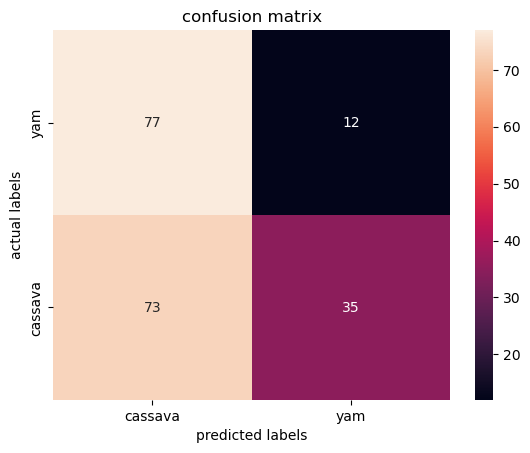

In [ ]:
ax=plt.subplot()
sns.heatmap(conf_mat4, annot=True, ax=ax)

ax.set_xlabel('predicted labels');ax.set_ylabel('actual labels');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels(['cassava','yam']);ax.yaxis.set_ticklabels(['yam','cassava']);

### Printing the Evaluation Metrics of the Model

In [ ]:
from sklearn.metrics import r2_score

MSE4 = np.square(np.subtract(y_test, y_pred4)).mean()
RMSE4 = math.sqrt(MSE4)
R_squared4 = r2_score(y_test, y_pred4)

print("Mean Square Error: ", MSE4)
print("Root Mean Square Error: ", RMSE4)
print("Coefficient of Determination: ", R_squared4)

Mean Square Error:  0.43147208121827413
Root Mean Square Error:  0.6568653448145017
Coefficient of Determination:  -0.7420932168123178


# logistic regresssion model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
LogisticRegression()

LogisticRegression()

### training the model

In [ ]:
y_pred_training12=logreg.predict(X_train)
(confusion_matrix(Y_train,y_pred_training12))
print(classification_report(Y_train,y_pred_training12))

              precision    recall  f1-score   support

           1       0.64      0.50      0.56       219
           2       0.62      0.74      0.68       238

    accuracy                           0.63       457
   macro avg       0.63      0.62      0.62       457
weighted avg       0.63      0.63      0.62       457



### testing the model

In [ ]:
y_pred12=logreg.predict(x_test)
(confusion_matrix(y_test,y_pred12))
print(classification_report(y_test,y_pred12))

              precision    recall  f1-score   support

           1       0.52      0.46      0.49        89
           2       0.59      0.65      0.62       108

    accuracy                           0.56       197
   macro avg       0.56      0.55      0.55       197
weighted avg       0.56      0.56      0.56       197



### generating predictions with the model using the value of x test

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat12=confusion_matrix(y_test,y_pred12)
conf_mat12

array([[41, 48],
       [38, 70]], dtype=int64)

### visualizing confusion_matrix for training

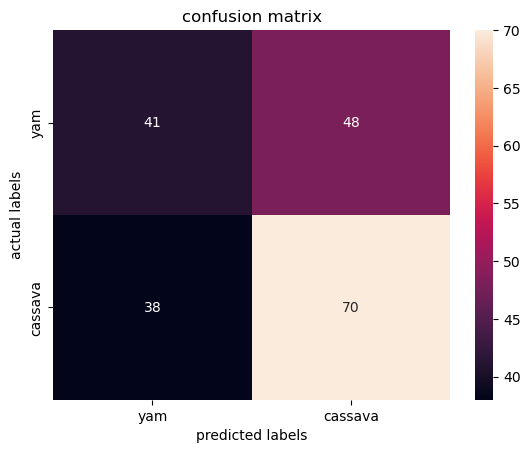

In [ ]:
ax=plt.subplot()
sns.heatmap(conf_mat12, annot=True, ax=ax)

ax.set_xlabel('predicted labels');ax.set_ylabel('actual labels');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels(['yam','cassava']);ax.yaxis.set_ticklabels(['yam','cassava']);

### K-Fold validation

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state =0, shuffle=True)
result12 = model_selection.cross_val_score(logreg, X_train, Y_train, cv=kfold)
result12
result12.mean()*100

61.04347826086956

### Printing the Evaluation Metrics of the Model

In [ ]:
from sklearn.metrics import r2_score

MSE12 = np.square(np.subtract(y_test, y_pred12)).mean()
RMSE12 = math.sqrt(MSE12)
R_squared12 = r2_score(y_test, y_pred12)

print("Mean Square Error: ", MSE12)
print("Root Mean Square Error: ", RMSE12)
print("Coefficient of Determination: ", R_squared12)



Mean Square Error:  0.4365482233502538
Root Mean Square Error:  0.6607179605173858
Coefficient of Determination:  -0.7625884311277569


# Ensemble learning (Adaboost)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,Y_train)
AdaBoostClassifier()
y_pred_training=adaboost.predict(X_train)
(confusion_matrix(Y_train,y_pred_training))
print(classification_report(Y_train,y_pred_training))

              precision    recall  f1-score   support

           1       0.86      0.87      0.86       219
           2       0.88      0.87      0.87       238

    accuracy                           0.87       457
   macro avg       0.87      0.87      0.87       457
weighted avg       0.87      0.87      0.87       457



### testing the model

In [ ]:
y_pred10 =adaboost.predict(x_test)
(confusion_matrix(y_test,y_pred10))
print(classification_report(y_test,y_pred10))


              precision    recall  f1-score   support

           1       0.70      0.81      0.75        89
           2       0.82      0.71      0.76       108

    accuracy                           0.76       197
   macro avg       0.76      0.76      0.76       197
weighted avg       0.76      0.76      0.76       197



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

# Create the voting classifier
voting = VotingClassifier(estimators=[('SVM', LSVC ), ('logistics Regression', logreg)])

# Define the KFold
kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)

# Perform cross-validation
result10 = model_selection.cross_val_score(voting, X_train, Y_train, cv=kfold)

# Display the results
print(result10)
print(result10.mean() * 100)


[0.65217391 0.5        0.60869565 0.60869565 0.54347826 0.58695652
 0.47826087 0.48888889 0.57777778 0.64444444]
56.893719806763286


The output you provided shows the cross-validation results for the VotingClassifier, with 10-fold cross-validation. The accuracy scores for each fold are displayed in the array:

[0.65217391, 0.5, 0.60869565, 0.60869565, 0.54347826, 0.58695652, 0.47826087, 0.48888889, 0.57777778, 0.64444444]

The mean accuracy across all folds is calculated by taking the average of these scores and multiplying it by 100:

56.893719806763286

This means that, on average, the VotingClassifier achieved an accuracy of approximately 56.89% in the cross-validation process

### 10 fold cross validation of soft voting

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state =0, shuffle=True)
result10= model_selection.cross_val_score(voting, X_train, Y_train, cv=kfold)
result10
result10.mean ()*100

56.893719806763286

### generating predictions with the model using the value of x test

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat10=confusion_matrix(y_test,y_pred10)
conf_mat10


array([[72, 17],
       [31, 77]], dtype=int64)

### visualizing confusion_matrix for training

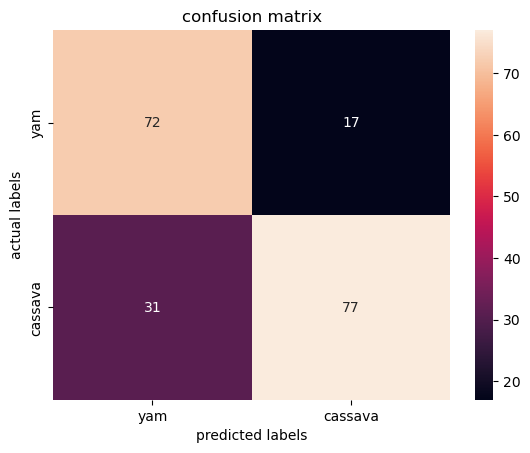

In [ ]:
ax=plt.subplot()
sns.heatmap(conf_mat10, annot=True, ax=ax)

ax.set_xlabel('predicted labels');ax.set_ylabel('actual labels');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels(['yam','cassava']);ax.yaxis.set_ticklabels(['yam','cassava']);



### Printing the Evaluation Metrics of the Model

In [ ]:
from sklearn.metrics import r2_score

MSE10 = np.square(np.subtract(y_test, y_pred10)).mean()
RMSE10 = math.sqrt(MSE10)
R_squared10 = r2_score(y_test, y_pred10)

print("Mean Square Error: ", MSE10)
print("Root Mean Square Error: ", RMSE10)
print("Coefficient of Determination: ", R_squared10)

Mean Square Error:  0.2436548223350254
Root Mean Square Error:  0.4936140418738363
Coefficient of Determination:  0.016229712858926493



# Hard voting


### combining decision tree, randomforest and knn


In [ ]:
voting = VotingClassifier(estimators = [("DTC",dtc_model),
                                        ("rf",rfc_model),
                                        ("knn",knn_model)],
                          voting = 'hard',
                          weights=None,
                          n_jobs=None,
                          flatten_transform=True,)

### training the model

In [ ]:
voting_model = voting.fit(X_train,Y_train)
y_pred_training = voting_model.predict(X_train)
(confusion_matrix(Y_train,y_pred_training))
print(classification_report(Y_train,y_pred_training))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       219
           2       1.00      1.00      1.00       238

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



### testing the model


In [ ]:
y_pred8 =voting_model.predict(x_test)
(confusion_matrix(y_test,y_pred8))
print(classification_report(y_test,y_pred8))


              precision    recall  f1-score   support

           1       0.83      0.92      0.87        89
           2       0.93      0.84      0.88       108

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



### 10-fold cross validation of hard voting

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state =0, shuffle=True)
result8 = model_selection.cross_val_score(voting, X_train, Y_train, cv=kfold)
result8
result8.mean()*100

85.10144927536231

### generating predictions with the model using the value of x test


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat8=confusion_matrix(y_test,y_pred8)
conf_mat8


array([[82,  7],
       [17, 91]], dtype=int64)

### visualizing confusion_matrix for training


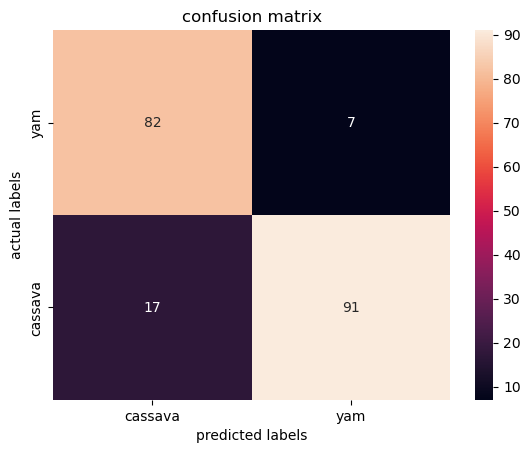

In [ ]:
ax=plt.subplot()
sns.heatmap(conf_mat8, annot=True, ax=ax)

ax.set_xlabel('predicted labels');ax.set_ylabel('actual labels');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels(['cassava','yam']);ax.yaxis.set_ticklabels(['yam','cassava']);

### Printing the Evaluation Metrics of the Model

In [ ]:
from sklearn.metrics import r2_score

MSE8 = np.square(np.subtract(y_test, y_pred8)).mean()
RMSE8 = math.sqrt(MSE8)
R_squared8 = r2_score(y_test, y_pred8)
print("Mean Square Error: ", MSE8)
print("Root Mean Square Error: ", RMSE8)
print("Coefficient of Determination: ", R_squared8)



Mean Square Error:  0.1218274111675127
Root Mean Square Error:  0.34903783629789004
Coefficient of Determination:  0.5081148564294633


# Majority voting (soft)


### combining decision tree, randomforest and knn


In [ ]:
voting = VotingClassifier(estimators = [("DTC",dtc_model),
                                        ("rf",rfc_model),
                                        ("knn",knn_model)],
                          voting = 'soft',
                          weights=None,
                          n_jobs=None,
                          flatten_transform=True,)
voting_model = voting.fit(X_train,Y_train)
y_pred_training = voting_model.predict(X_train)
(confusion_matrix(Y_train,y_pred_training))
print(classification_report(Y_train,y_pred_training))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       219
           2       1.00      1.00      1.00       238

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



### testing the model

In [ ]:
y_pred9 =voting_model.predict(x_test)
(confusion_matrix(y_test,y_pred9))
print(classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           1       0.85      0.94      0.89        89
           2       0.95      0.86      0.90       108

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



### 10 fold cross validation of soft voting

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state =0, shuffle=True)
result9 = model_selection.cross_val_score(voting, X_train, Y_train, cv=kfold)
result9
result9.mean()*100


85.76811594202897

### generating predictions with the model using the value of x test

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat9=confusion_matrix(y_test,y_pred9)
conf_mat9


array([[84,  5],
       [15, 93]], dtype=int64)

### visualizing confusion_matrix for training

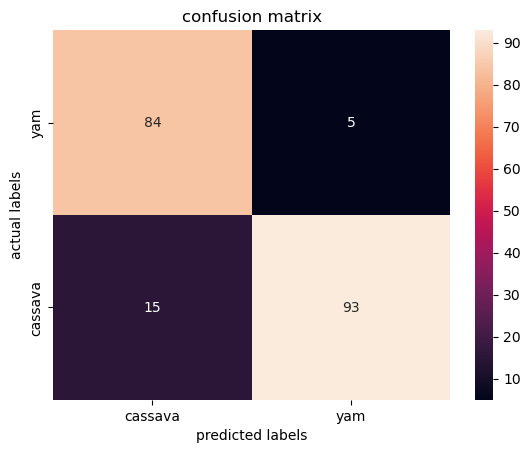

In [ ]:
ax=plt.subplot()
sns.heatmap(conf_mat9, annot=True, ax=ax)

ax.set_xlabel('predicted labels');ax.set_ylabel('actual labels');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels(['cassava','yam']);ax.yaxis.set_ticklabels(['yam','cassava']);

### Printing the Evaluation Metrics of the Model

In [ ]:
from sklearn.metrics import r2_score

MSE9 = np.square(np.subtract(y_test, y_pred9)).mean()
RMSE9 = math.sqrt(MSE9)
R_squared9 = r2_score(y_test, y_pred9)
print("Mean Square Error: ", MSE9)
print("Root Mean Square Error: ", RMSE9)
print("Coefficient of Determination: ", R_squared9)

Mean Square Error:  0.10152284263959391
Root Mean Square Error:  0.31862649393858306
Coefficient of Determination:  0.5900957136912194



# STACK CLASSIFIER


In [ ]:
from sklearn.ensemble import StackingClassifier
level0=list()
level0.append(('knn',knn))
level0.append(('dtc',DecisionTreeClassifier()))
level0.append(('rf',RFC))

level1 = KNeighborsClassifier(n_neighbors=200, metric="minkowski")
stacking = StackingClassifier(estimators=level0,final_estimator=level1)
stacking.fit(X_train,Y_train)
StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('dtc', DecisionTreeClassifier()),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=10,
                                                       random_state=0))],
                   final_estimator=KNeighborsClassifier(n_neighbors=200))
y_pred_training =stacking.predict(X_train)
(confusion_matrix(Y_train,y_pred_training))
print(classification_report(Y_train,y_pred_training))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       219
           2       1.00      1.00      1.00       238

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457




### testing the model


In [ ]:
y_pred7 =stacking.predict(x_test)

(confusion_matrix(y_test,y_pred7))
print(classification_report(y_test,y_pred7))


              precision    recall  f1-score   support

           1       0.93      0.96      0.94        89
           2       0.96      0.94      0.95       108

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197




### 10-f0ld cross validation


In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state =0, shuffle=True)
result7 = model_selection.cross_val_score(stacking, X_train, Y_train, cv=kfold)
result7
result7.mean()*100


85.12077294685992


### generating predictions with the model using the value of x test


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat7=confusion_matrix(y_test,y_pred7)
conf_mat7


array([[ 85,   4],
       [  6, 102]], dtype=int64)


### visualizing confusion_matrix for training


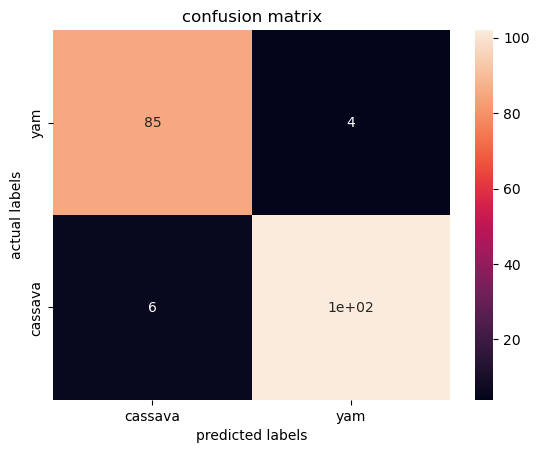

In [ ]:
ax=plt.subplot()
sns.heatmap(conf_mat7, annot=True, ax=ax)

ax.set_xlabel('predicted labels');ax.set_ylabel('actual labels');
ax.set_title('confusion matrix');
ax.xaxis.set_ticklabels(['cassava','yam']);ax.yaxis.set_ticklabels(['yam','cassava']);


# Section of graphical representation of the results

In [ ]:
#library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### creating the dataset

In [ ]:
x,y=make_classification()
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =0)
data = {'KNN':68, 'DT':83, 'RF':85, 'SVM':55,'ABT':57,'Hard_V1':85,'Soft_V2':86,'LR':61,'ST':85}
Models = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (15, 10))


<Figure size 1500x1000 with 0 Axes>

### creating the bar plot


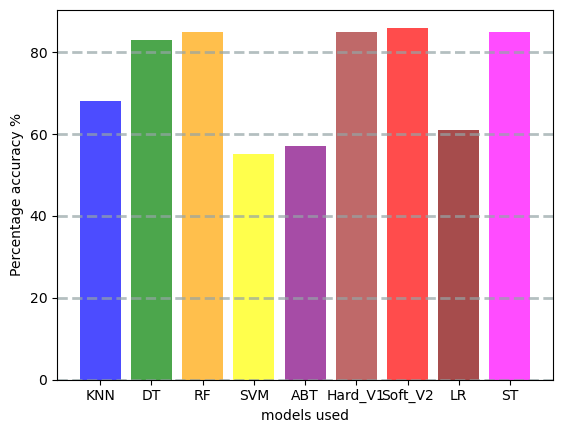

In [ ]:
plt.bar(Models, values, color =['blue','green','orange','yellow','purple','brown','red','maroon','magenta','black'], alpha=0.7)
plt.grid(color='#95a5a6',linestyle='--',linewidth=2, axis='y', alpha=0.7)
plt.xlabel("models used")
plt.ylabel("Percentage accuracy %")
plt.show()


### bar graph representation of accuracy


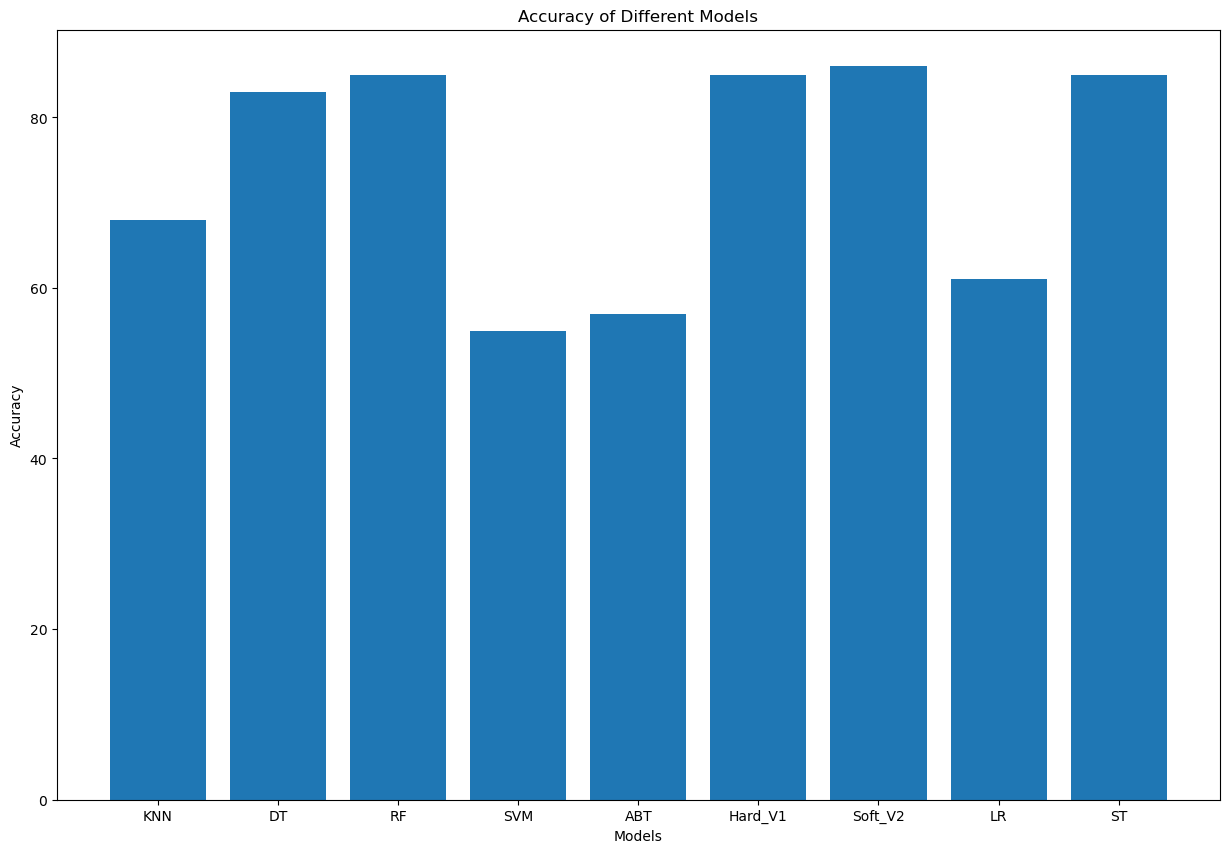

In [ ]:
import matplotlib.pyplot as plt
data = {'KNN':68, 'DT':83, 'RF':85, 'SVM':55,'ABT':57,'Hard_V1':85,'Soft_V2':86,'LR':61,'ST':85}
Models = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (15, 10))

plt.bar(Models, values)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()



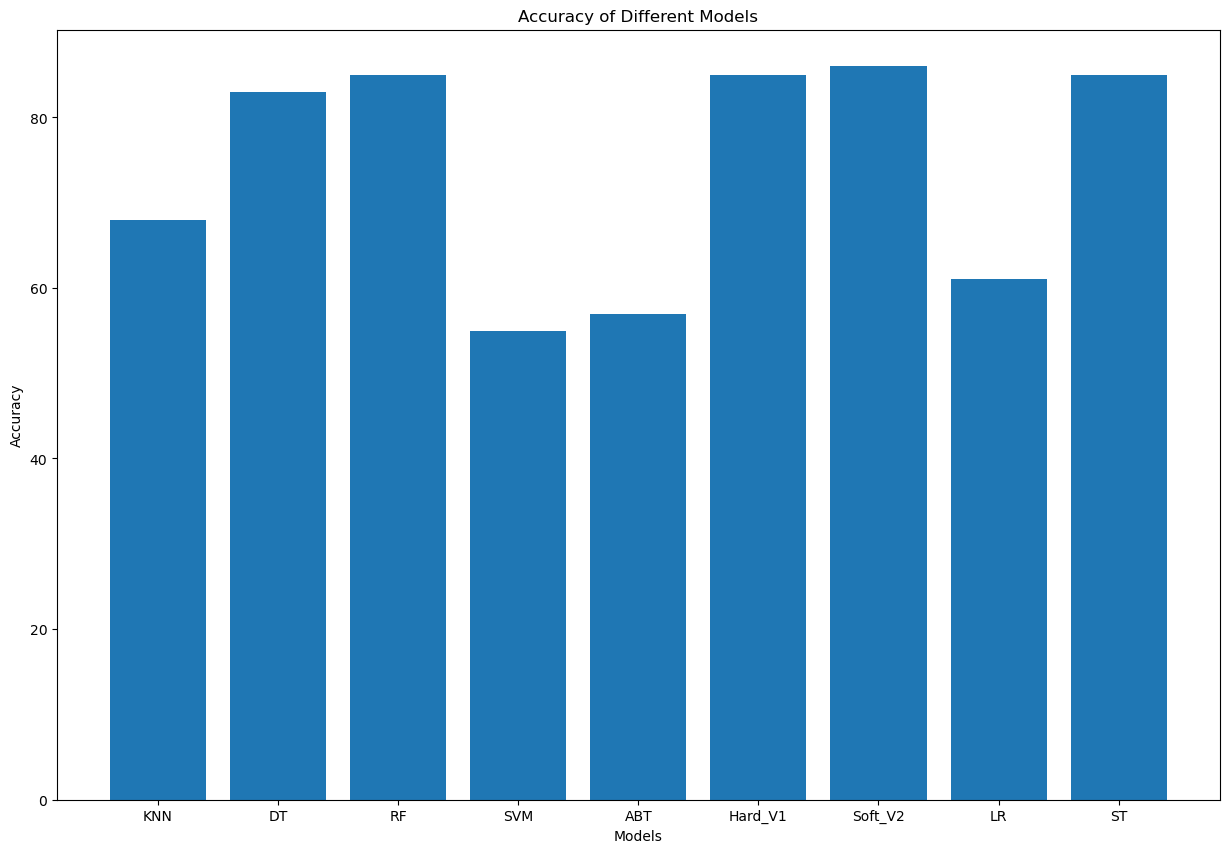

In [ ]:
import matplotlib.pyplot as plt

data = {'KNN':68, 'DT':83, 'RF':85, 'SVM':55,'ABT':57,'Hard_V1':85,'Soft_V2':86,'LR':61,'ST':85}
Models = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(15, 10))
plt.bar(Models, values)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()


### creating the bar plot

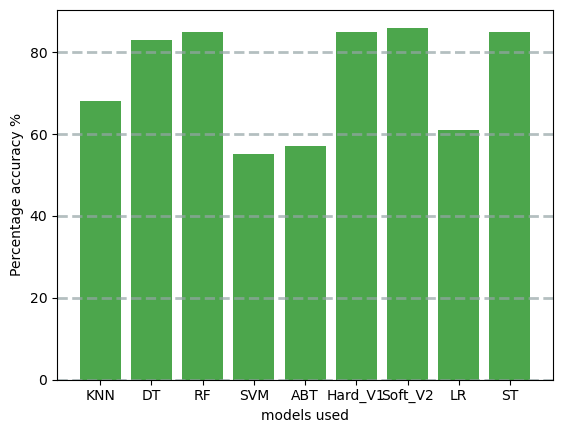

In [ ]:
plt.bar(Models, values, color ='g', alpha=0.7)
plt.grid(color='#95a5a6',linestyle='--',linewidth=2, axis='y', alpha=0.7)
plt.xlabel("models used")
plt.ylabel("Percentage accuracy %")
plt.show()


### Pair plot of dataset indicating distribution of data points

<Figure size 640x480 with 0 Axes>

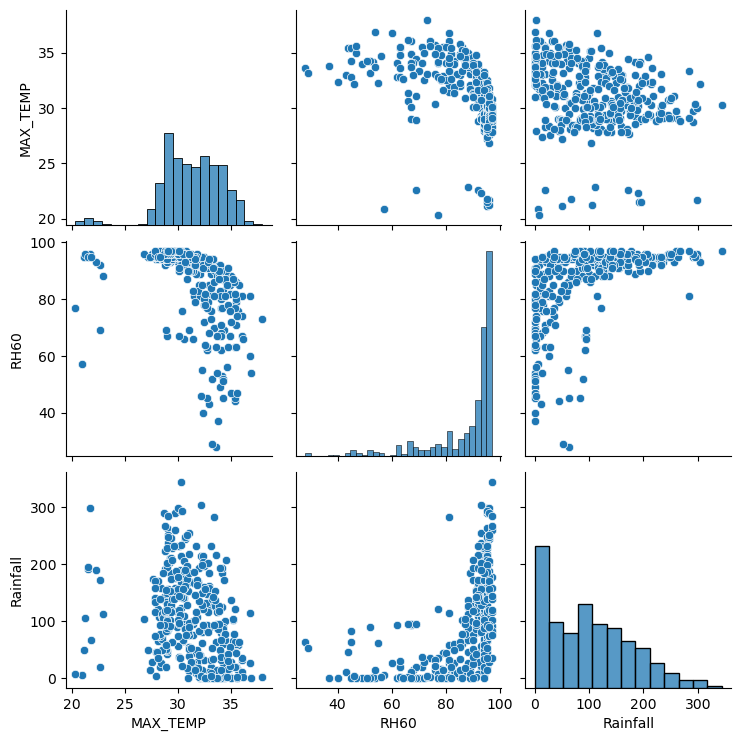

In [ ]:
import pandas as pd
import seaborn as sns
import seaborn
import matplotlib.pyplot as plt
dataset=pd.read_csv("dataset1.csv")
plt.figure()
seaborn.pairplot(dataset[['MAX_TEMP','RH60','Rainfall']],)
plt.show()

### Plot of precision and recall

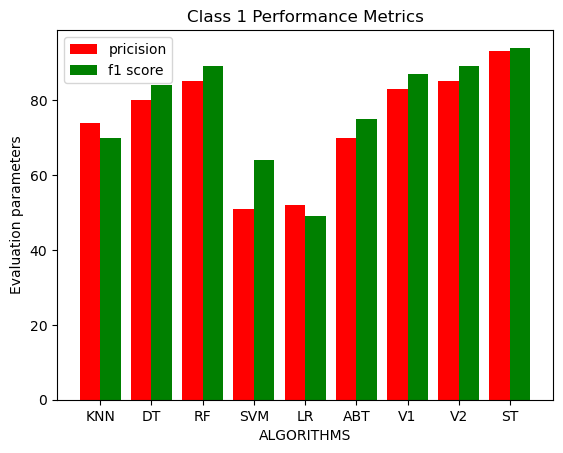

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=['KNN', 'DT', 'RF', 'SVM','LR','ABT','V1','V2','ST']
x_Pricision = [74, 80, 85, 51, 52, 70, 83, 85, 93]
y_f1_score = [70, 84, 89, 64, 49, 75, 87, 89, 94]

X_axix=np.arange(len(X))
plt.bar(X_axix - 0.2, x_Pricision, 0.4,label='pricision', color='r')
plt.bar(X_axix + 0.2, y_f1_score, 0.4,label='f1 score', color='g',)
plt.xticks(X_axix, X)
plt.xlabel("ALGORITHMS")
plt.ylabel('Evaluation parameters')
plt.title("Class 1 Performance Metrics")
plt.legend()
plt.show()

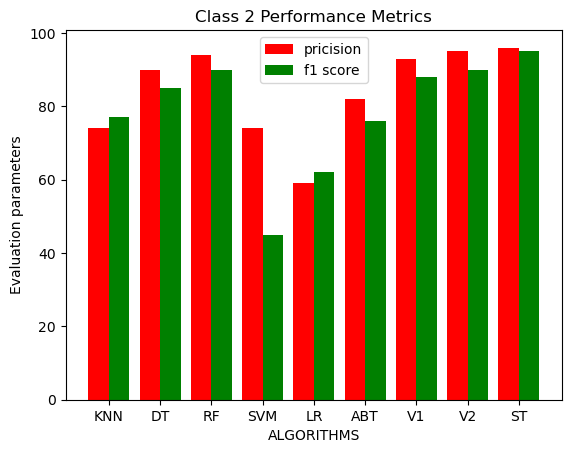

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=['KNN', 'DT', 'RF', 'SVM','LR','ABT','V1','V2','ST']
x_Pricision = [74, 90, 94, 74, 59, 82, 93, 95, 96]
y_f1_score = [77, 85, 90, 45, 62, 76, 88, 90, 95]


X_axix=np.arange(len(X))
plt.bar(X_axix - 0.2, x_Pricision, 0.4,label='pricision', color='r')
plt.bar(X_axix + 0.2, y_f1_score, 0.4,label='f1 score', color='g',)
plt.xticks(X_axix, X)
plt.xlabel("ALGORITHMS")
plt.ylabel('Evaluation parameters')
plt.title("Class 2 Performance Metrics")
plt.legend()
plt.show()

### Plot of AUC and ROC

In [ ]:
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
probs=model.predict_proba(x_test)
preds=probs[:, 1]
fpr, tpr, threshhold = metrics.roc_curve(y_test, preds)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics



### define the predictor variables and response variables

In [ ]:

x=dataset[['Rainfall','MAX_TEMP','RH60']]
y=dataset['CROP']



### AUC AND ROC Logistic Regression
instantiate the models

In [ ]:
model= LogisticRegression()

fit the model uusing the training data

In [ ]:
model.fit(X_train,Y_train)
LogisticRegression()



LogisticRegression()

Define metrics

In [ ]:
y_pred_proba=model.predict_proba(x_test)[::,1]
fpr, tpr, threshhold = metrics.roc_curve(y_test, y_pred_proba)

Create ROC curve

Text(0.5, 0, 'False Positive Rate')

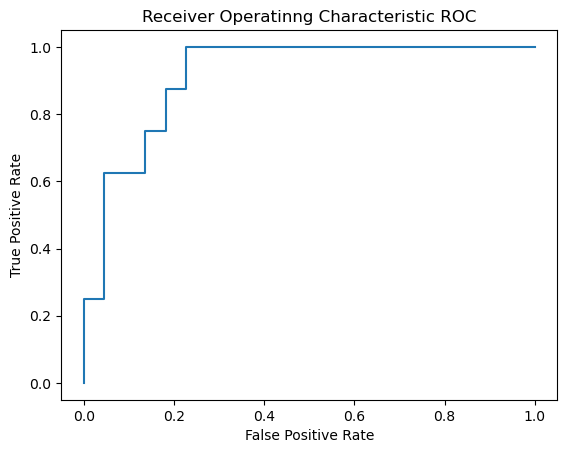

In [ ]:
plt.title('Receiver Operatinng Characteristic ROC')
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Estimating area under curve AUC

In [ ]:
auc=metrics.roc_auc_score(y_test, y_pred_proba)

### ROC and AUC for Random Forest
Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ROC curve and AUC score

AUC: 0.95


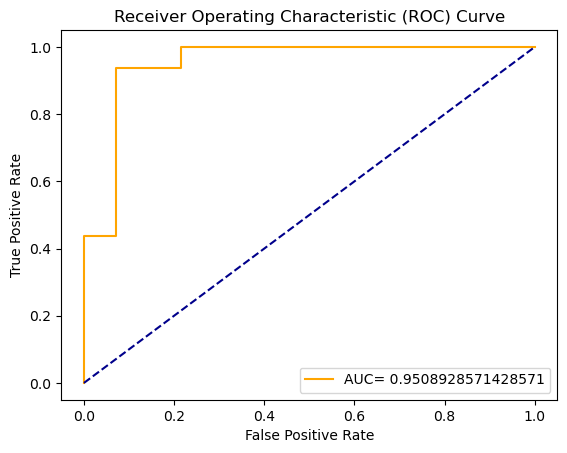

In [ ]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Defining a python function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label="AUC= " +str(auc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#Generate sample data.
x,y=make_classification()
#Split the data into train and test sub-datasets
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =0)

#Fit a model on the train data.
model1 = RandomForestClassifier()
model1.fit(X_train,Y_train)
RandomForestClassifier()

#Predict probabilities for the test data.
probs = model1.predict_proba(x_test)

#Keep Probabilities of the positive class only
probs = probs[:, 1]

#Compute the AUC Score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

#Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plot ROC Curve using the defined function
plot_roc_curve(fpr, tpr)

AUC: 0.93


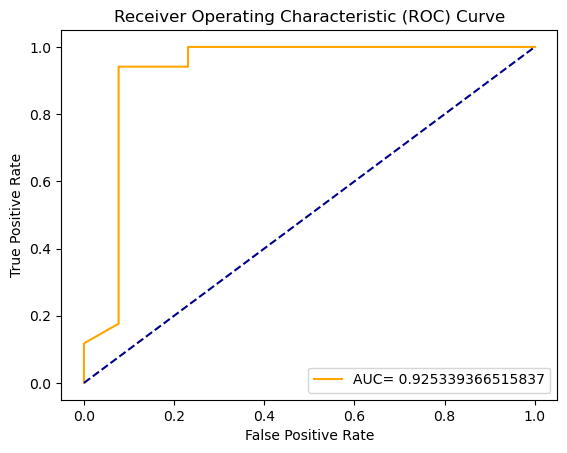

In [ ]:

#Generate sample data.
x,y=make_classification()
#Split the data into train and test sub-datasets
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =0)

#Fit a model on the train data.
model1 = RandomForestClassifier()
model1.fit(X_train,Y_train)
RandomForestClassifier()

#Predict probabilities for the test data.
probs = model1.predict_proba(x_test)

#Keep Probabilities of the positive class only
probs = probs[:, 1]

#Compute the AUC Score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

#Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plot ROC Curve using the defined function
plot_roc_curve(fpr, tpr)

## AUC AND ROC FOR DECISION TREE

AUC: 0.81


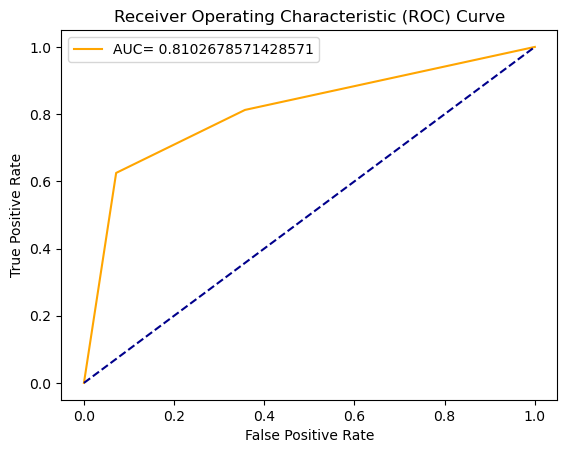

In [ ]:
#Defining a python function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label="AUC= " +str(auc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#Generate sample data.
x,y=make_classification()

#Split the data into train and test sub-datasets
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =0)

#Fit a model on the train data.
dtc= DecisionTreeClassifier(criterion = "entropy", min_samples_leaf=2,
                            random_state = 100)
dtc_model = dtc.fit(X_train,Y_train)

#Predict probabilities for the test data.
probs = dtc.predict_proba(x_test)

#Keep Probabilities of the positive class only
probs = probs[:, 1]

#Compute the AUC Score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
#Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)

## AUC and ROC for AdaBoot classifier

AUC: 0.74


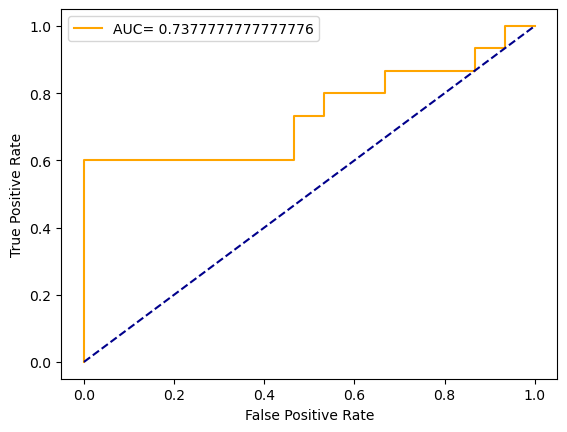

In [ ]:
#Defining a python function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label="AUC= " +str(auc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

#Generate sample data.
x,y=make_classification()

#Split the data into train and test sub-datasets
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =0)

#Fit a model on the train data.
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,Y_train)

AdaBoostClassifier()

#Predict probabilities for the test data.
probs = adaboost.predict_proba(x_test)

#Keep Probabilities of the positive class only
probs = probs[:, 1]

#Compute the AUC Score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

#Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)


## The code below saves the model as a pickle file

In [ ]:
import os

model_path = os.path.abspath('model.pkl')
print(f"The saved model is located at: {model_path}")

The saved model is located at: C:\Users\Nuh\model.pkl


In [ ]:
import joblib
joblib.dump(rfc_model, 'model.pkl')


['model.pkl']